## 1. VGG Structure

In [1]:
# 模型下载地址，可以下载到本地
model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [24]:
import torch
import torchvision.models as models

In [25]:
vgg = models.vgg19(pretrained=True)

In [26]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [27]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

如果使用下载到本地的预训练模型, pretrained默认为False, 

则需要提供本地的模型路径, 并使用load_state_dict加载.

vgg_model = models.vgg19()

pre = torch.load('/XXXX/vgg19-dcbb9e9d.pth')

vgg_model.load_state_dict(pre)

In [28]:
structure = torch.nn.Sequential(*list(vgg.children())[:])
structure

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [29]:
# vgg._modules
vgg._modules.keys()

odict_keys(['features', 'avgpool', 'classifier'])

In [30]:
# 获取模型的第一个Sequential,也就是features部分
features = torch.nn.Sequential(*list(vgg.children())[0])
features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [31]:
# 同理，可以索引到其他Sequential,比如索引classifier部分
classifier = torch.nn.Sequential(*list(vgg.children())[-1])
classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [32]:
# 在获取到最后一个classifier部分的基础上, 再切割模型, 得到输出维度为4096的子模型.
new_classifier = torch.nn.Sequential(*list(vgg.children())[-1][:5])
new_classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
)

从上述输出可以看出, 与vgg19模型的原始classifier相比, new_classifier的模型结构已经去掉了最后一层全连接层和一个Dropout层, 能够得到输出维度为4096的特征了.

所以下面, 我们就用new_classifier替换vgg19原始模型中的分类器( classifier )部分, 保留vgg19模型前面的features和avgpool不变.代码如下:

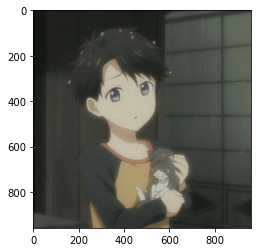

In [33]:
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pylab as plt

img_src = "https://cdn.jsdelivr.net/gh/jinxiqinghuan/jinxiqinghuan.github.io/medias/avatar.jpg"
response = requests.get(img_src)
image = Image.open(BytesIO(response.content))
plt.imshow(image)

In [34]:
img_src = "https://cdn.jsdelivr.net/gh/jinxiqinghuan/jinxiqinghuan.github.io/medias/avatar.jpg"
response = requests.get(img_src)

In [35]:
# img = Image.fromarray(image.astype('uint8')).convert('RGB')
# img

In [36]:
import numpy as np

In [37]:
img = np.asarray(image)

In [38]:
img.shape

(959, 959, 3)

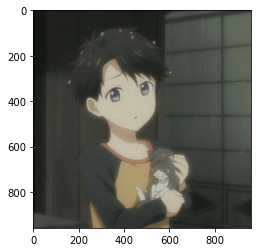

In [39]:
plt.imshow(img)

**模型的修改方法**

可以单独抽取一个模块，进行重写

In [40]:
from torchvision import transforms as transforms

# 得到原始模型，输出图像的维度是1000
vgg_model_1000 = models.vgg19(pretrained=True)

# 修改模型
# 去掉最后一个全连接层，使输出图像的维度是4096
vgg_model_4096 = models.vgg19(pretrained=True)
# 只取classifier的前五个层，去掉最后一个全连接层
new_classifier = torch.nn.Sequential(*list(vgg_model_4096.children())[-1][:5])
print(new_classifier)

# 这个地方，可以自己写个Sequential，然后更换一下
vgg_model_4096.classifier = new_classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
)


In [41]:
# import torch.nn as nn
# my_classifier = torch.nn.Sequential(nn.Conv2d(3, 3, kernel_size = 3, bias=True))

In [42]:
# vgg_model_4096.classifier = my_classifier
# vgg_model_4096

In [43]:
# 处理图像

type(img), img.shape, img.max(), img.min(), img.mean()

(numpy.ndarray, (959, 959, 3), 210, 8, 72.87204693801438)

In [44]:
trans = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.465, 0.406], std = [0.229, 0.224, 0.225])
])
image = trans(image)
type(image), image.max(), image.min(), image.mean()

(torch.Tensor, tensor(1.4722), tensor(-1.9124), tensor(-0.7349))

In [45]:
image.shape

torch.Size([3, 224, 224])

In [46]:
image = image.unsqueeze(dim=0)
image.shape

torch.Size([1, 3, 224, 224])

In [47]:
# vgg19获取特征表示
image_feature_1000 = vgg_model_1000(image)
image_feature_1000.shape

torch.Size([1, 1000])

In [48]:
image_feature_4096 = vgg_model_4096(image)
image_feature_4096.shape

torch.Size([1, 4096])

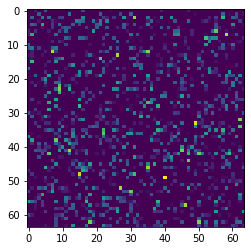

In [49]:
# 这一步没有意义，因为最后加了分类器，最后的输出不是特征
tmp_feature = image_feature_4096.view(64, 64)
# 直接转化tmp_feature报错，是因为包含梯度，使用下面的命令解决
tmp_feature = tmp_feature.cpu().detach().numpy()
tmp_feature.shape
plt.imshow(tmp_feature)

In [50]:
features = torch.nn.Sequential(*list(vgg.children())[0])
features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## 2. The Style and Content of an image




![VGG](https://github.com/anish-g/Style-Transfer-Using-Convolutional-Neural-Networks/raw/d8802cf15ae4155ece2f59e6ab1eda4718305d77/assets/vgg19_convlayers.png)


风格转换损失依赖分离图像的内容和风格。
比如给一张新图片，它在保持自身内容的同时，还能具有其他图片的风格（这就是所谓的图像风格迁移）

![](https://github.com/anish-g/Style-Transfer-Using-Convolutional-Neural-Networks/raw/d8802cf15ae4155ece2f59e6ab1eda4718305d77/assets/style_tx_cat.png)

**加载VGG19特征提取模块**

In [51]:
vgg = models.vgg19(pretrained=True).features

In [52]:
# 设置参数不需要优化更新了
for param in vgg.parameters():
    param.requires_grad_(False)

In [53]:
# gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [54]:
## 载入图像
## 图像链接 
## Content：   https://cdn.jsdelivr.net/gh/jinxiqinghuan/jinxiqinghuan.github.io/medias/avatar.jpg
## Style:      https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1137728107,3197011930&fm=26&gp=0.jpg

Style
<!-- ![]( https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1137728107,3197011930&fm=26&gp=0.jpg) -->

内容
<!-- ![](https://cdn.jsdelivr.net/gh/jinxiqinghuan/jinxiqinghuan.github.io/medias/avatar.jpg) -->

In [55]:
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pylab as plt
from torchvision import transforms as transforms


def load_image(img_url, max_size=400, shape=None):
    '''加载并处理图片，使图像长宽小于400'''
    request_img = requests.get(img_url)
    image = Image.open(BytesIO(request_img.content)).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
        
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406),
                                             (0.229, 0.224, 0.225))])
    
    # discard the transparent, alpha channels (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [56]:
device = 'cpu'
content = load_image("https://cdn.jsdelivr.net/gh/jinxiqinghuan/jinxiqinghuan.github.io/medias/avatar.jpg").to(device)
style = load_image("https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1137728107,3197011930&fm=26&gp=0.jpg", shape=content.shape[-2:]).to(device)

In [57]:
def im_convert(tensor):
    '''Display a temsor as an image'''
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
    
    return image

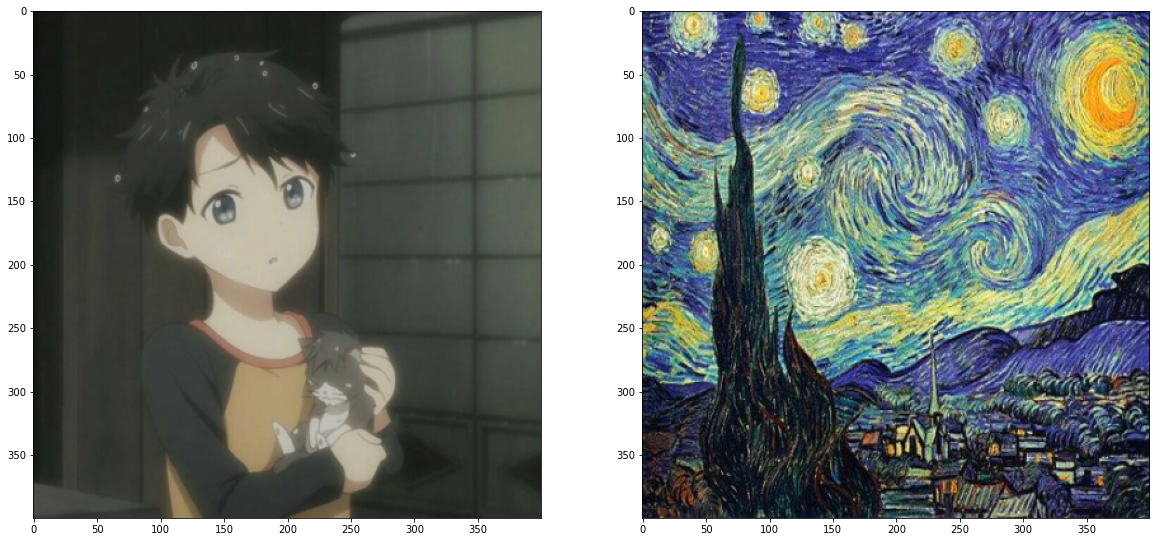

In [58]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

In [84]:
layers = {'0': 'conv1_1',
     '5': 'conv2_1',
     '10': 'conv3_1',
     '19': 'conv4_1',
     '21': 'conv4_2',
     '28': 'conv5_1'}

In [85]:
features = {}
x = content
for name, layer in vgg._modules.items():
    x = layer(x)
    if name in layers:
        features[layers[name]] = x
        
for key in features:
    print(key, ": ", features[key].shape)

conv1_1 :  torch.Size([1, 64, 400, 400])
conv2_1 :  torch.Size([1, 128, 200, 200])
conv3_1 :  torch.Size([1, 256, 100, 100])
conv4_1 :  torch.Size([1, 512, 50, 50])
conv4_2 :  torch.Size([1, 512, 50, 50])
conv5_1 :  torch.Size([1, 512, 25, 25])


In [86]:
# for name, layers in vgg._modules.items():
#     print(layers)
#     print(name, 9 * "________")

In [87]:
def get_features(image, model, layers=None):
    """
    实现论文Gatys et al (2016)
    """
    if layers is None:
        layers = {'0': 'conv1_1',
                 '5': 'conv2_1',
                 '10': 'conv3_1',
                 '19': 'conv4_1',
                 '21': 'conv4_2',
                 '28': 'conv5_1'
                 }
    features = {}
    x = image
    # model._modules is a dictionary holding each module in model
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    # print(features)
    return features

In [88]:
# 格拉姆矩阵
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h*w)
    gram = torch.mm(tensor, tensor.t())
    
    return gram

In [89]:
tmp = torch.ones(1, 3, 32, 32)
gram_matrix(tmp).shape
# [3, 1024] * [3, 1024]

torch.Size([3, 3])

In [90]:
# 特征提取
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)


# print(content[0])



# 计算每层的格拉姆矩阵
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}
# 创建一个内容图像发副本（作为生成图像的变换基板）
target = content.clone().requires_grad_(True).to(device)

In [91]:
# weights for each style layer
# weighting earlier layers more will result in *larger* style artifacts
# notice here excluding `conv4_2` content representation
# 单层权重的设置
# 对前边的层进行更多的加权，会导致生成图片更具“Style”
# 这里没有设置conv_4_2的权重
style_weights = {'conv1_1': 1.,
                'conv2_1': 0.75,
                'conv3_1': 0.2,
                'conv4_1': 0.2,
                'conv5_1': 0.2}

# 内容和风格权重
content_weight = 1 # alpha
style_weight = 1e6 # beta

Total loss:  5696723.5


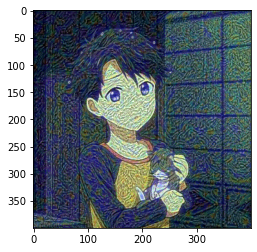

KeyboardInterrupt: 

In [93]:

# 每1000次展示一次target
show_every = 1000

# 迭代超参数
optimizer = optim.Adam([target], lr=0.003)
steps = 5000

for ii in range(1, steps+1):
    # 从目标图像中获取特征
    # 然后计算内容损失
    target_features = get_features(target, vgg) # 获取每层的特征
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    style_loss = 0
    # 遍历风格层，并添加style loss
    for layer in style_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        _, d, h, w = target_feature.shape
        
        # 计算目标图像的格拉姆矩阵
        target_gram = gram_matrix(target_feature)
        
        # Get the "style" style representation
        style_gram = style_grams[layer]
        # 计算一层的风格损失，适当加权
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        
        style_loss += layer_style_loss / (d * h * w)
    
    # 计算总损失
    total_loss = content_weight * content_loss + style_weight * style_loss
    
    # Update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # Display intermediate images and print the loss
    if ii % show_every == 0:
        print('Total loss: ', total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()

## 3. Cifar10分类实验

In [31]:
import torch
from torch import nn
import torchvision 
from torchvision import models, transforms

In [32]:
vgg  = models.vgg19(pretrained=True)

In [33]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

十分类问题，在classifier模块添加一层输出十分类

In [43]:
classifier_add_10 = torch.nn.Sequential(
    *list(vgg.children())[-1],
    nn.ReLU(inplace = True), 
    nn.Dropout(p=0.5, inplace = False), 
    nn.Linear(1000, 10)
)

In [46]:
# classifier_add_10
vgg.classifier = classifier_add_10
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
  (7): ReLU(inplace=True)
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
"""
实现LeNet来分类cifar10，10个epoch的效果为50%左右
"""
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader



# 超参数设置
batch_size = 32
epoch = 10

# 数据集加载与处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0., ), (1., ))])

train_dataset = datasets.CIFAR10(root='../datasets/cifar10/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.CIFAR10(root='../datasets/cifar10/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = vgg.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0
    for batch_idx, data in enumerate(train_loader, 0):
        # print(batch_idx)
        images, labels =data
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print("Epoch:", epoch + 1, "Batch_idx:", batch_idx + 1, "Loss:", running_loss / 300)
            # print('[%d, %5d] loss: %.3f' % (epoch + 1), batch_idx + 1, running_loss / 300)
            running_loss = 0.0


def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print("accuracy on test set : %d %% " % (100 * correct / total))


if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

